### Import Necessary Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Merging 12 Months of Sales Data into a Single File

In [2]:
onlyfiles = [f for f in os.listdir("./Sales_Data")]

all_months_data=pd.DataFrame()

for file in onlyfiles:
    df=pd.read_csv(f"./Sales_Data/{file}")
    all_months_data=pd.concat([all_months_data,df])

all_months_data.to_csv("./Output/all_data.csv",index=False)

### Read in updated dataframe

In [3]:
all_data=pd.read_csv("./Output/all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### clean up the data

In [5]:
all_data.dropna(how='any',axis="rows",inplace = True)
all_data.dropna(how='any',axis="columns",inplace = True)

#### find "or" and delete it

In [6]:
all_data=all_data[all_data["Order Date"].str[0:2]!="Or"]

#### convert columns to the correct type

In [7]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

#### add month column

In [8]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype("int32")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### add a sales column

In [9]:
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### add a city column

In [10]:
#lets use .apply()
def get_city(address):
    return address.split(",")[1]

all_data["City"]=all_data["Purchase Address"].apply(lambda x: get_city(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


## what was the best month for sales? how much was earned that month?

In [11]:
results=all_data.groupby("Month").sum()
print(results)

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


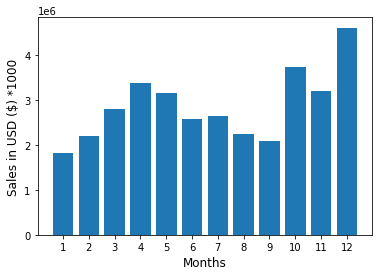

In [12]:
months=range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months,size=10)
plt.xlabel("Months",size=12)
plt.ylabel("Sales in USD ($) *1000",size=12)
plt.show()

## what city had the highest number of sales?

In [13]:
results_for_cities=all_data.groupby("City").sum()
print(results)

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


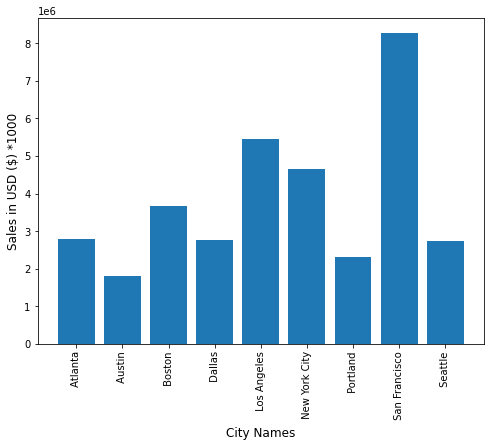

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
cities=[city for city,df in all_data.groupby("City")]
plt.bar(cities,results_for_cities["Sales"])
plt.xticks(cities, rotation="vertical",size=10)
plt.xlabel("City Names",size=12)
plt.ylabel("Sales in USD ($) *1000",size=12)
plt.show()

## what time should we display advertisements to maximize likelihood of cumtomer s nuying product

In [15]:
all_data["Order Date New"]=pd.to_datetime(all_data["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date New
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00


In [16]:
all_data["Hour"]=all_data["Order Date New"].dt.hour
all_data["Minute"]=all_data["Order Date New"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date New,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00,9,27


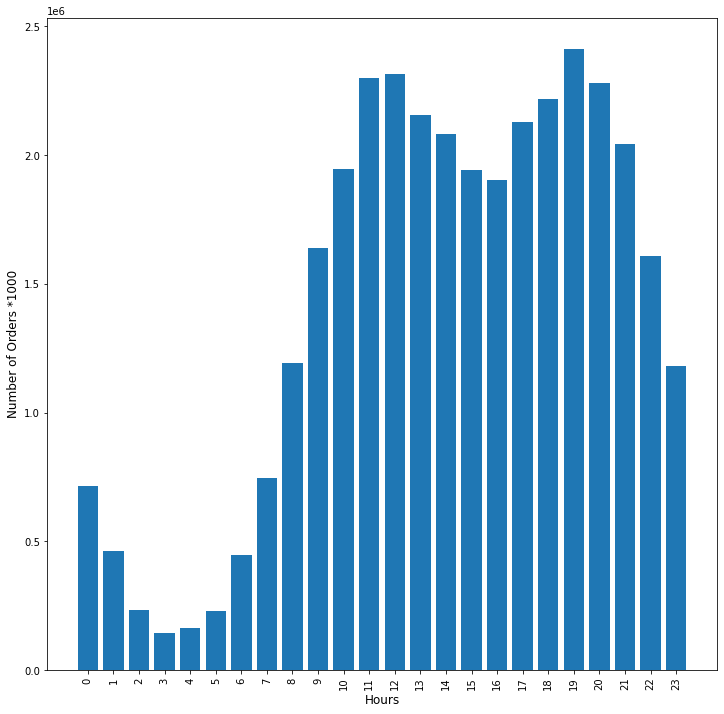

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
results_for_hours=all_data.groupby("Hour").sum()
hours=[hour for hour,df in all_data.groupby("Hour")]
plt.bar(hours,results_for_hours["Sales"])
plt.xticks(hours, rotation="vertical",size=10)
plt.xlabel("Hours",size=12)
plt.ylabel("Number of Orders *1000",size=12)
plt.show()

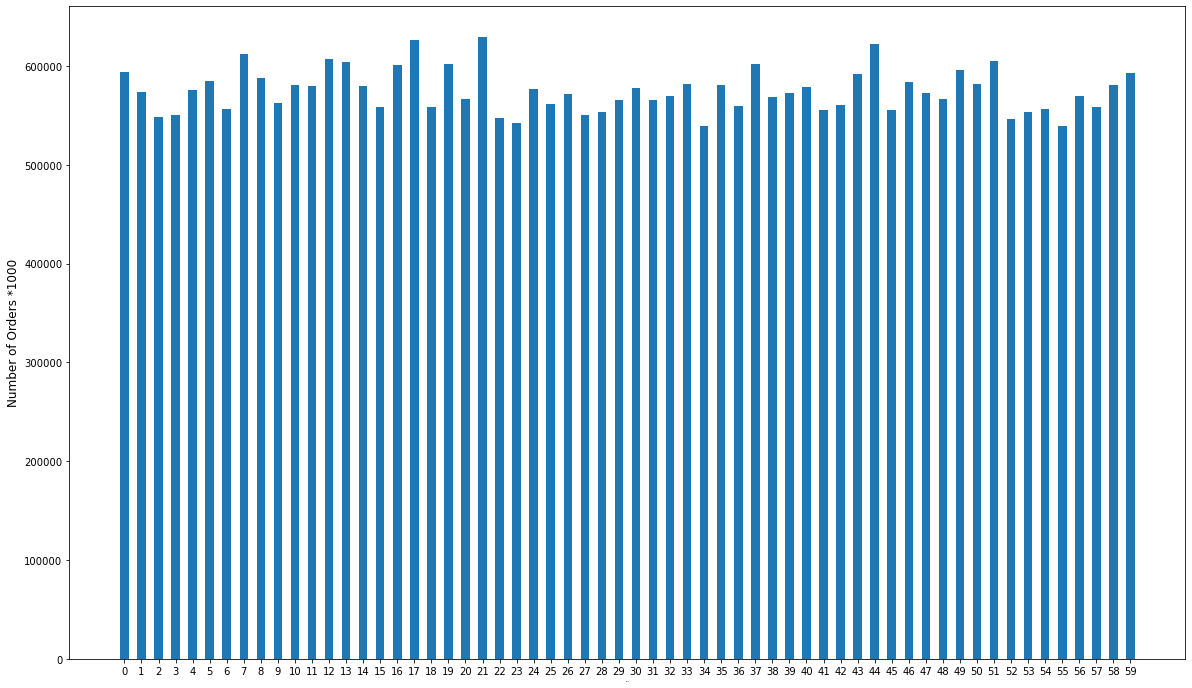

In [18]:
fig, ax = plt.subplots(figsize=(20,12))
results_for_minute=all_data.groupby("Minute").sum()
minutes=[minute for minute,df in all_data.groupby("Minute")]
plt.bar(minutes,results_for_minute["Sales"],width=0.5)
plt.xticks(minutes,size=10)
plt.xlabel("Minutes",size=1)
plt.ylabel("Number of Orders *1000",size=12)
plt.show()

## what products are most often sold together

In [23]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()
df

<ipython-input-23-1894393d0f02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [29]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(value,key)

1005 ('iPhone', 'Lightning Charging Cable')
987 ('Google Phone', 'USB-C Charging Cable')
447 ('iPhone', 'Wired Headphones')
414 ('Google Phone', 'Wired Headphones')
361 ('Vareebadd Phone', 'USB-C Charging Cable')
360 ('iPhone', 'Apple Airpods Headphones')
220 ('Google Phone', 'Bose SoundSport Headphones')
160 ('USB-C Charging Cable', 'Wired Headphones')
143 ('Vareebadd Phone', 'Wired Headphones')
92 ('Lightning Charging Cable', 'Wired Headphones')


## what products sold the most? why do you whink it sold the most?

In [33]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()["Quantity Ordered"]

quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

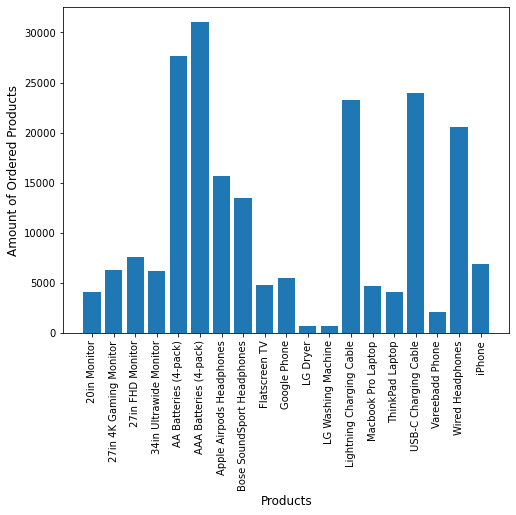

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
products=[product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation="vertical",size=10)
plt.xlabel("Products",size=12)
plt.ylabel("Amount of Ordered Products",size=12)
plt.show()

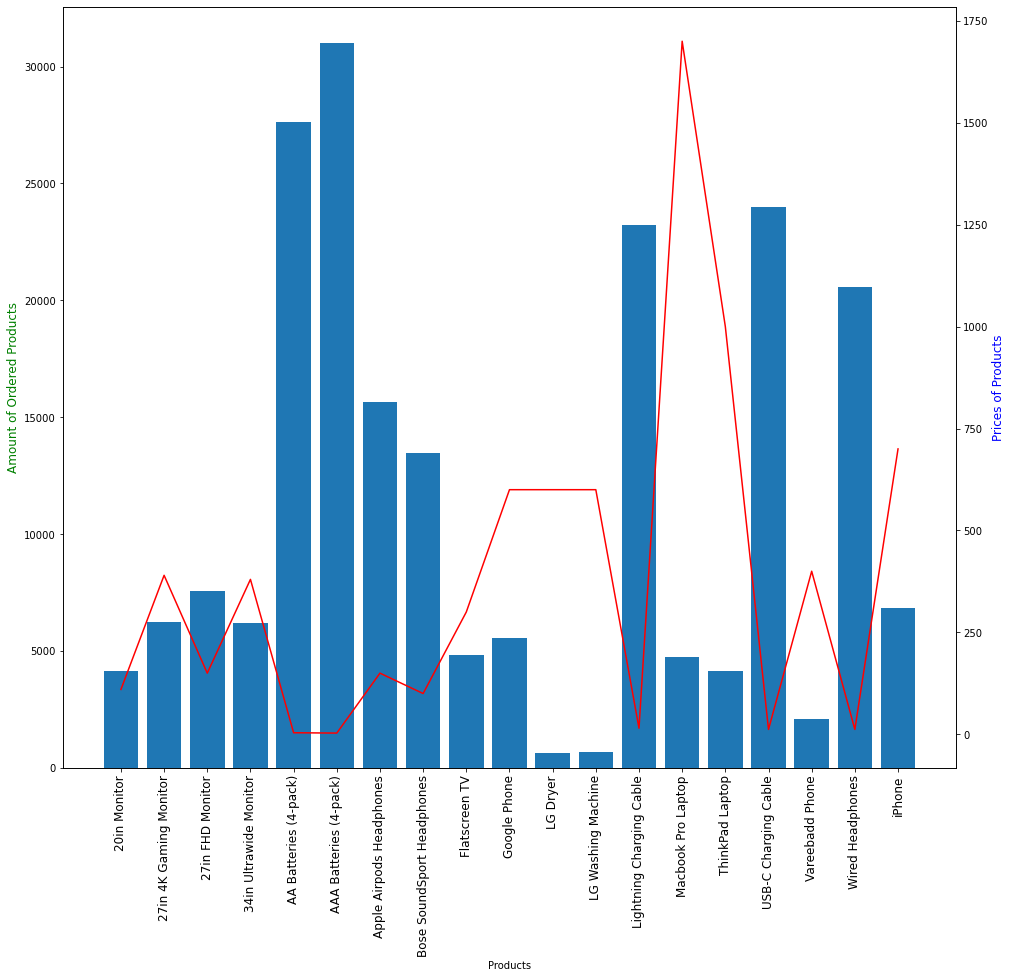

In [59]:
prices = all_data.groupby('Product').mean()["Price Each"]

fig, ax1 = plt.subplots(figsize=(16,14))

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'r-')


ax1.set_xticklabels(products,rotation="vertical",size=12)
ax1.set_xlabel('Products')
ax1.set_ylabel('Amount of Ordered Products', color='g',size=12)
ax2.set_ylabel('Prices of Products', color='b',size=12)

plt.show()